In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocess

from PIL import Image
from multiprocessing import Pool
from sklearn.model_selection import train_test_split

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
image_dir = "data/train_images/"

train_df = pd.read_csv("data/train.csv")
train_df["path"] = image_dir + train_df["id_code"] + ".png"

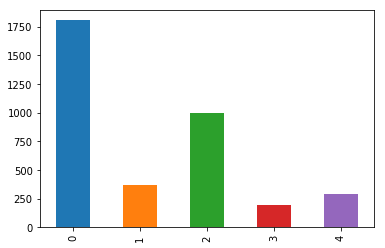

In [20]:
train_df["diagnosis"].value_counts().sort_index().plot.bar()

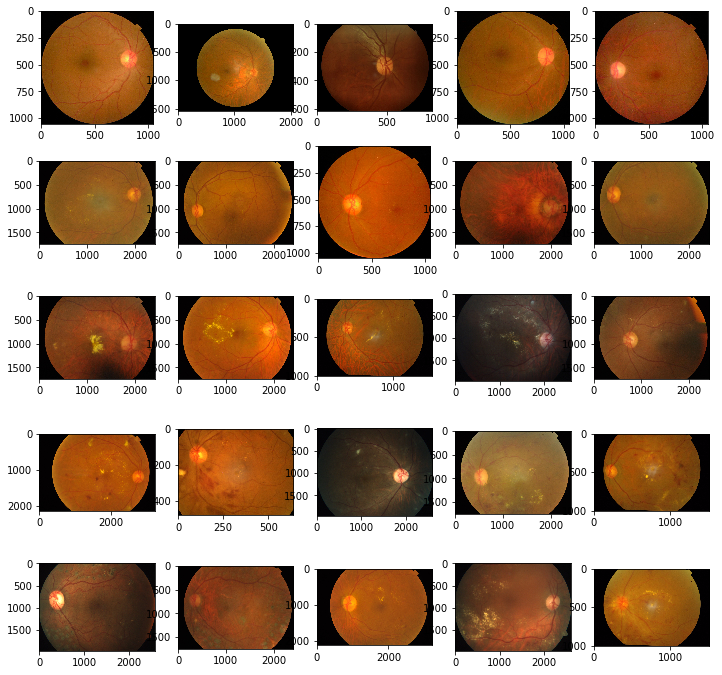

In [31]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

for i in range(5):
    samples = train_df[train_df["diagnosis"] == i]["id_code"].sample(5)
    for j in range(5):
        img = np.array(Image.open(os.path.join(image_dir, samples.iloc[j] + ".png")))
        axes[i][j].imshow(img)

In [3]:
def get_mean_value_by_channel(id_code):
    img = np.array(Image.open(os.path.join(image_dir, id_code + ".png")))
    return np.mean(img, axis=(0, 1)), np.std(img, axis=(0, 1))

In [11]:
# means = []
# stds = []

pool = Pool(10)
res = pool.map(get_mean_value_by_channel, train_df["id_code"])

# for i, id_code in enumerate(train_df["id_code"]):
#     mean, std = get_mean_value_by_channel(id_code)
#     means.append(mean)
#     stds.append(stds)


In [23]:
means = np.array([v[0] for v in res])
stds = np.array([v[1] for v in res])

print("Mean: {mean}, Std: {std}".format(mean=np.mean(means, axis=0), std=np.mean(stds, axis=0)))

Mean: [105.52776859  56.36061928  18.78834612], Std: [60.92763057 33.665175   12.66183186]


In [26]:
seed = 404

train, val = train_test_split(train_df, test_size=0.15, train_size=0.85, random_state=seed)

In [32]:
train.to_csv("data/training_set.csv", index=None)
val.to_csv("data/validation_set.csv", index=None)

In [40]:
generator = preprocess.ImageGenerator(train_df, batch_size=16, image_size=(299, 299), preprocess_fn=preprocess.mean_std_normalization)

In [41]:
batch_generator = generator.batch_generator()